In [1]:
from matplotlib.pyplot import plot
import pandas as pd
import numpy as np

from utils import find_nearest

In [2]:
MAX_RESISTANCE = 1000

In [3]:
STEPS = 256

In [4]:
steps = [i for i in range(STEPS)]

In [5]:
steps

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [6]:
STEP = MAX_RESISTANCE / STEPS

In [7]:
STEP

3.90625

In [8]:
values = [(STEP * step) + STEP for step in steps]

In [9]:
values

[3.90625,
 7.8125,
 11.71875,
 15.625,
 19.53125,
 23.4375,
 27.34375,
 31.25,
 35.15625,
 39.0625,
 42.96875,
 46.875,
 50.78125,
 54.6875,
 58.59375,
 62.5,
 66.40625,
 70.3125,
 74.21875,
 78.125,
 82.03125,
 85.9375,
 89.84375,
 93.75,
 97.65625,
 101.5625,
 105.46875,
 109.375,
 113.28125,
 117.1875,
 121.09375,
 125.0,
 128.90625,
 132.8125,
 136.71875,
 140.625,
 144.53125,
 148.4375,
 152.34375,
 156.25,
 160.15625,
 164.0625,
 167.96875,
 171.875,
 175.78125,
 179.6875,
 183.59375,
 187.5,
 191.40625,
 195.3125,
 199.21875,
 203.125,
 207.03125,
 210.9375,
 214.84375,
 218.75,
 222.65625,
 226.5625,
 230.46875,
 234.375,
 238.28125,
 242.1875,
 246.09375,
 250.0,
 253.90625,
 257.8125,
 261.71875,
 265.625,
 269.53125,
 273.4375,
 277.34375,
 281.25,
 285.15625,
 289.0625,
 292.96875,
 296.875,
 300.78125,
 304.6875,
 308.59375,
 312.5,
 316.40625,
 320.3125,
 324.21875,
 328.125,
 332.03125,
 335.9375,
 339.84375,
 343.75,
 347.65625,
 351.5625,
 355.46875,
 359.375,
 363.281

In [10]:
# формула R = ((R1 + R2) * (R3 + R4)) / ((R1 + R2) + (R3 + R4))

In [11]:
def next_value(values):
    for r1 in values:
        for r2 in values:
            for r3 in values:
                for r4 in values:
                    r12 = r1 + r2
                    r34 = r3 + r4
                    r = (r12 * r34) / (r12 + r34)
                    yield r

In [12]:
arr = np.array(values, dtype=np.float32)

In [13]:
arr.dtype

dtype('float32')

In [14]:
gen = next_value(arr)

In [15]:
possible_values = []
for r1 in values:
    for r2 in values:
        r11 = r1 + 10000
        possible_value = (r11 * r2) / (r11 + r2)
        possible_values.append(possible_value)

In [16]:
possible_values = sorted(list(set(possible_values)))

In [17]:
possible_values

[3.90472531225605,
 3.90472590714007,
 3.9047265015600625,
 3.904727095516569,
 3.9047276890101323,
 3.9047282820412934,
 3.904728874610592,
 3.9047294667185675,
 3.9047300583657587,
 3.9047306495527034,
 3.9047312402799377,
 3.9047318305479983,
 3.9047324203574205,
 3.904733009708738,
 3.9047335986024843,
 3.904734187039193,
 3.904734775019395,
 3.9047353625436214,
 3.904735949612403,
 3.904736536226269,
 3.9047371223857477,
 3.9047377080913668,
 3.9047382933436534,
 3.9047388781431334,
 3.9047394624903324,
 3.904740046385775,
 3.9047406298299845,
 3.904741212823484,
 3.9047417953667956,
 3.90474237746044,
 3.9047429591049383,
 3.9047435403008097,
 3.904744121048574,
 3.9047447013487475,
 3.904745281201849,
 3.9047458606083945,
 3.9047464395688993,
 3.9047470180838784,
 3.9047475961538463,
 3.9047481737793155,
 3.9047487509607994,
 3.9047493276988092,
 3.9047499039938556,
 3.904750479846449,
 3.904751055257099,
 3.904751630226314,
 3.904752204754601,
 3.9047527788424685,
 3.9047533524

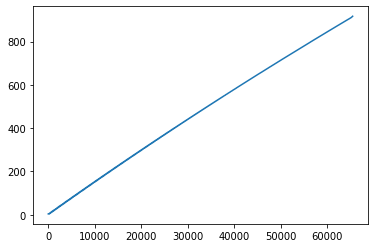

In [18]:
plot(possible_values)

In [19]:
psteps = [possible_values[i] - possible_values[i - 1]  for i in range(1, len(possible_values))]

In [20]:
psteps

[5.948840202663064e-07,
 5.944199923391125e-07,
 5.939565066448438e-07,
 5.934935631835003e-07,
 5.930311610669037e-07,
 5.92569298518697e-07,
 5.921079755388803e-07,
 5.916471912392751e-07,
 5.911869447317031e-07,
 5.907272342398073e-07,
 5.902680606517663e-07,
 5.898094221912231e-07,
 5.893513175259102e-07,
 5.888937462117383e-07,
 5.884367086927966e-07,
 5.879802018604607e-07,
 5.87524226602909e-07,
 5.870687815878739e-07,
 5.866138659271769e-07,
 5.861594787326396e-07,
 5.857056191160837e-07,
 5.852522866334198e-07,
 5.847994799523804e-07,
 5.843471990729654e-07,
 5.838954426629073e-07,
 5.834442093899384e-07,
 5.829934996981478e-07,
 5.825433113670897e-07,
 5.820936443967639e-07,
 5.816444983430813e-07,
 5.81195871429685e-07,
 5.807477641006642e-07,
 5.803001736914837e-07,
 5.79853101534411e-07,
 5.794065454090003e-07,
 5.789605048711621e-07,
 5.785149790327182e-07,
 5.780699678936685e-07,
 5.776254692335669e-07,
 5.77181483940592e-07,
 5.767380097942976e-07,
 5.762950463505945e-0

In [21]:
df = pd.read_csv("data/pt_500.csv")

In [22]:
df

,T,R
0,-50,401.570
1,-48,405.532
2,-46,409.494
3,-44,413.456
4,-42,417.418
...,...,...
71,92,677.308
72,94,681.106
73,96,684.904
74,98,688.702


In [23]:
pt_500 = [value for value in possible_values if 400 < value < 700]

In [24]:
mapping_pt_500 = {r: find_nearest(pt_500, r) for r in df["R"]}

In [25]:
mapping_pt_500

{401.57: 401.56880271360467,
 405.532: 405.5326398852224,
 409.494: 409.49126886626885,
 413.456: 413.4561727335165,
 417.418: 417.15066621113766,
 421.38: 420.76502732240436,
 425.328: 424.37692045066575,
 429.276: 429.91375887518683,
 433.224: 433.4901475532312,
 437.172: 437.1750835499443,
 441.12: 441.1230646630237,
 445.056: 445.05254919499106,
 448.992: 448.9923603793467,
 452.928: 452.92827268023456,
 456.864: 456.77331518039483,
 460.8: 460.3606668935012,
 464.726: 463.94557823129253,
 468.652: 469.107624674358,
 472.578: 472.65479678199404,
 476.504: 476.50513950073423,
 480.43: 480.4306608884074,
 484.344: 484.34444987557765,
 488.258: 488.2552721386069,
 492.172: 492.17134734665746,
 496.086: 496.08447149643706,
 500.0: 499.66101694915255,
 503.902: 504.4609751575825,
 507.804: 507.98189631208305,
 511.706: 511.70294685546156,
 515.608: 515.6037549854967,
 519.51: 519.5117047891351,
 523.4: 523.3975559767277,
 527.29: 527.2907608695652,
 531.18: 531.1816339224433,
 535.07: 5